In [62]:
from numpy import *
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
from dmba import classificationSummary
from sklearn import linear_model
import seaborn as sns
import numpy as np

In [63]:
import os
os.getcwd()
os.chdir('C:\\Users\\Ken\\Desktop\\IT 483')

In [66]:
imdb_df = pd.read_csv('imdb.csv')
imdb_df = imdb_df.dropna()
imdb_df.head(5)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,886204,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,471220,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,275868,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,1144337,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,212204,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,2.35,24000


In [67]:
imdb_df.tail(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_voted_users,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes
5026,Color,Olivier Assayas,81.0,110.0,107.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,...,3924,39.0,French,France,R,4500.0,2004.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,...,4555,26.0,Persian,Iran,Not Rated,10000.0,2000.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,...,72639,371.0,English,USA,PG-13,7000.0,2004.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,52055,130.0,Spanish,USA,R,7000.0,1992.0,6.9,1.37,0
5042,Color,Jon Gunn,43.0,90.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,John August,...,4285,84.0,English,USA,PG,1100.0,2004.0,6.6,1.85,456


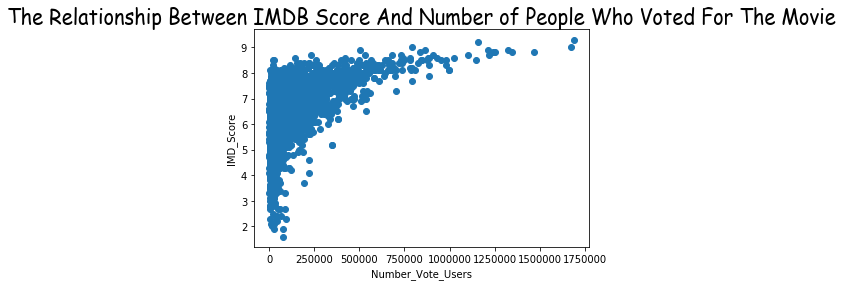

In [68]:
x = imdb_df[['num_voted_users']]
y = imdb_df['imdb_score']

plt.scatter(x, y)

plt.title('The Relationship Between IMDB Score And Number of People Who Voted For The Movie', fontdict={'fontname': 'Comic sans MS', 'fontsize': 20})

plt.ylabel('IMD_Score')
plt.xlabel('Number_Vote_Users')

plt.show()

In [69]:
reg = linear_model.LinearRegression()

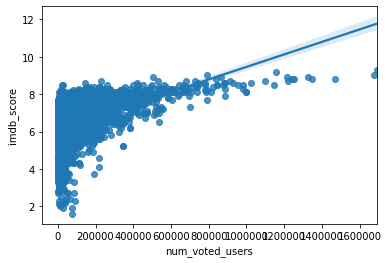

In [70]:
sns.regplot(x='num_voted_users', y='imdb_score', data=imdb_df, fit_reg=True)

In [71]:
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
reg.coef_

array([3.34805937e-06])

In [73]:
reg.intercept_

6.1114989695555115

In [74]:
imdb_df['pred'] = reg.predict(x)

In [75]:
print(imdb_df[['num_voted_users', 'pred', 'imdb_score']])

      num_voted_users      pred  imdb_score
0              886204  9.078563         7.9
1              471220  7.689172         7.1
2              275868  7.035121         6.8
3             1144337  9.942807         8.5
5              212204  6.821971         6.6
...               ...       ...         ...
5026             3924  6.124637         6.9
5027             4555  6.126749         7.5
5033            72639  6.354699         7.0
5035            52055  6.285782         6.9
5042             4285  6.125845         6.6

[3779 rows x 3 columns]


In [76]:
imdb_df['error'] = imdb_df['pred'] - imdb_df['imdb_score']

In [77]:
mse = mean(imdb_df['error']**2)
print(mse**.5)

0.9263614072244039


In [78]:
corrcoef(imdb_df['pred'], imdb_df['imdb_score'])

array([[1.        , 0.48143196],
       [0.48143196, 1.        ]])

In [79]:
R2 = reg.score(x, y)
print(R2)

0.23177672768061075


In [80]:
X, y = imdb_df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'num_user_for_reviews', 'budget', 'movie_facebook_likes']], imdb_df.imdb_score
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
reg.coef_

array([ 1.60135173e-03,  1.17919640e-02,  6.77903263e-06, -4.97968984e-07,
       -2.35352462e-09,  4.06007019e-06, -5.54136087e-04, -5.44838192e-11,
       -3.59217501e-06])

In [82]:
reg.intercept_

4.813640340188986

In [83]:
imdb_df['pred'] = reg.predict(imdb_df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'num_user_for_reviews', 'budget', 'movie_facebook_likes']])

In [84]:
imdb_df['error'] = imdb_df['pred'] - imdb_df['imdb_score']

In [85]:
mse = mean(imdb_df['error']**2)
rmse = mse**.5
print(rmse)

0.8732203613906139


In [86]:
corrcoef(imdb_df['imdb_score'], imdb_df['pred'])

array([[1.        , 0.56337152],
       [0.56337152, 1.        ]])

In [87]:
R2 = reg.score(X, y)
print(R2)

0.3173874642828851


In [88]:
adj_R2 = (1 - (1 - R2)) * (1436 - 1) / (1436 - 3 - 1)
print(adj_R2)

0.31805238215498616


In [89]:
x = imdb_df['pred']
y = imdb_df['imdb_score']

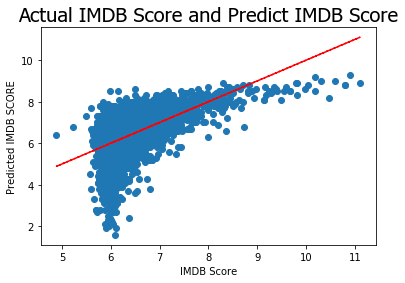

In [90]:
plt.title('Actual IMDB Score and Predict IMDB Score', fontdict={'fontname': 'Tahoma', 'fontsize': 20}),
plt.xlabel('IMDB Score')
plt.ylabel('Predicted IMDB SCORE')
plt.scatter(x, y)
#trend line
z = polyfit(x, y, 1)
p = poly1d(z)
plt.plot(x, p(x), 'r--')
plt.show()